In [1]:
# Extracting data from Spotify and creating structured data - Albums, Artist, Songs

In [2]:
!pip install spotipy

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
# provide client_id and client_secret - Authentication 
client_credentials_manager = SpotifyClientCredentials(client_id='', client_secret='')

In [5]:
#Create spotify object to use & extract data from Spotify - Authorization 
sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)


In [6]:
# Assign URL of Top Songs - Global playlist to a variable 
playlist_link = 'https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF'

In [7]:
# Extracting playlist ID using split
playlist_ID= playlist_link.split('/')[-1]

In [8]:
data = sp.playlist_tracks(playlist_ID)

In [9]:
data #json data - information about artist, album, songs

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbNG2KDcFcKOF/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2024-01-05T11:50:35Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/45dkTj5sMRSjrmBSBeiHym'},
       'href': 'https://api.spotify.com/v1/artists/45dkTj5sMRSjrmBSBeiHym',
       'id': '45dkTj5sMRSjrmBSBeiHym',
       'name': 'Tate McRae',
       'type': 'artist',
       'uri': 'spotify:artist:45dkTj5sMRSjrmBSBeiHym'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',

In [10]:
len(data['items'])
#total number of songs

50

In [11]:
data['items'][0]['track']['album']['name']
#Top song

'greedy'

In [12]:
data['items'][0]['track']['album']['release_date']

'2023-09-15'

In [13]:
data['items'][0]['track']['album']['total_tracks']


1

In [14]:
data['items'][0]['track']['album']['external_urls']['spotify']

'https://open.spotify.com/album/3UOV8XvCwMKaATRNXrYCjN'

In [15]:
for row in data['items']:
    album_id = row['track']['album']['id']
    album_name = row['track']['album']['name']
    album_release_date = row['track']['album']['release_date']
    album_total_tracks = row['track']['album']['total_tracks']
    album_url = row['track']['album']['external_urls']['spotify']
    print(album_name)

greedy
La Diabla
Lovin On Me
Lover
The Land Is Inhospitable and So Are We
The Idol Episode 4 (Music from the HBO Original Series)
GOLDEN
Scarlet
La Víctima
BELLAKEO
Stick Season
Water
Strangers
nadie sabe lo que va a pasar mañana
MAÑANA SERÁ BONITO (BICHOTA SEASON)
GOLDEN
AM
FERXXOCALIPSIS
Que Onda
Pa las Baby's Y Belikeada
Popular (Music from the HBO Original Series)
Si No Estás
GUTS
Scarlet
Harry's House
Starboy
SOS
Dance The Night (From Barbie The Album)
Daylight
Endless Summer Vacation
Don Juan
Prada
What Was I Made For? [From The Motion Picture "Barbie"]
nadie sabe lo que va a pasar mañana
Houdini
The Forever Story (Extended Version)
After Hours
Rompe La Dompe
LA VIDA ES UNA
I'm Good (Blue)
Zach Bryan
3D : The Remixes
GÉNESIS
Strange Trails
SOS
Starboy
El Comienzo
Layover
a Gift & a Curse
Rave & Roses Ultra


In [16]:
album_list = []
for row in data['items']:
    album_id = row['track']['album']['id']
    album_name = row['track']['album']['name']
    album_release_date = row['track']['album']['release_date']
    album_total_tracks = row['track']['album']['total_tracks']
    album_url = row['track']['album']['external_urls']['spotify']
    album_element = {'album_id':album_id,'name':album_name,'release_date':album_release_date,
                        'total_tracks':album_total_tracks,'url':album_url}
    album_list.append(album_element)

In [17]:
album_list #creating more stuctured data for albums

[{'album_id': '3UOV8XvCwMKaATRNXrYCjN',
  'name': 'greedy',
  'release_date': '2023-09-15',
  'total_tracks': 1,
  'url': 'https://open.spotify.com/album/3UOV8XvCwMKaATRNXrYCjN'},
 {'album_id': '2IoSjweCu07y9mv5H1Cj3v',
  'name': 'La Diabla',
  'release_date': '2023-11-30',
  'total_tracks': 1,
  'url': 'https://open.spotify.com/album/2IoSjweCu07y9mv5H1Cj3v'},
 {'album_id': '6VCO0fDBGbRW8mCEvV95af',
  'name': 'Lovin On Me',
  'release_date': '2023-11-10',
  'total_tracks': 1,
  'url': 'https://open.spotify.com/album/6VCO0fDBGbRW8mCEvV95af'},
 {'album_id': '1NAmidJlEaVgA3MpcPFYGq',
  'name': 'Lover',
  'release_date': '2019-08-23',
  'total_tracks': 18,
  'url': 'https://open.spotify.com/album/1NAmidJlEaVgA3MpcPFYGq'},
 {'album_id': '2Cn1d2KgbkAqbZCJ1RzdkA',
  'name': 'The Land Is Inhospitable and So Are We',
  'release_date': '2023-09-15',
  'total_tracks': 11,
  'url': 'https://open.spotify.com/album/2Cn1d2KgbkAqbZCJ1RzdkA'},
 {'album_id': '7tzVd1fwkxsorytCBjEJkU',
  'name': 'The Idol

In [18]:
artist_list = []
for row in data['items']:
    for key, value in row.items():
        if key == "track":
            for artist in value['artists']:
                artist_dict = {'artist_id':artist['id'], 'artist_name':artist['name'], 'external_url': artist['href']}
                artist_list.append(artist_dict)

In [19]:
artist_list

[{'artist_id': '45dkTj5sMRSjrmBSBeiHym',
  'artist_name': 'Tate McRae',
  'external_url': 'https://api.spotify.com/v1/artists/45dkTj5sMRSjrmBSBeiHym'},
 {'artist_id': '3Me35AWHCGqW4sZ7bWWJt1',
  'artist_name': 'Xavi',
  'external_url': 'https://api.spotify.com/v1/artists/3Me35AWHCGqW4sZ7bWWJt1'},
 {'artist_id': '2LIk90788K0zvyj2JJVwkJ',
  'artist_name': 'Jack Harlow',
  'external_url': 'https://api.spotify.com/v1/artists/2LIk90788K0zvyj2JJVwkJ'},
 {'artist_id': '06HL4z0CvFAxyc27GXpf02',
  'artist_name': 'Taylor Swift',
  'external_url': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02'},
 {'artist_id': '2uYWxilOVlUdk4oV9DvwqK',
  'artist_name': 'Mitski',
  'external_url': 'https://api.spotify.com/v1/artists/2uYWxilOVlUdk4oV9DvwqK'},
 {'artist_id': '1Xyo4u8uXC1ZmMpatF05PJ',
  'artist_name': 'The Weeknd',
  'external_url': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ'},
 {'artist_id': '250b0Wlc5Vk0CoUsaCY84M',
  'artist_name': 'JENNIE',
  'external_url': 'https://

In [20]:
song_list = []
for row in data['items']:
    song_id = row['track']['id']
    song_name = row['track']['name']
    song_duration = row['track']['duration_ms']
    song_url = row['track']['external_urls']['spotify']
    song_popularity = row['track']['popularity']
    song_added = row['added_at']
    album_id = row['track']['album']['id']
    artist_id = row['track']['album']['artists'][0]['id']
    song_element = {'song_id':song_id,'song_name':song_name,'duration_ms':song_duration,'url':song_url,
                    'popularity':song_popularity,'song_added':song_added,'album_id':album_id,
                    'artist_id':artist_id
                   }
    song_list.append(song_element)

In [21]:
song_list

[{'song_id': '3rUGC1vUpkDG9CZFHMur1t',
  'song_name': 'greedy',
  'duration_ms': 131872,
  'url': 'https://open.spotify.com/track/3rUGC1vUpkDG9CZFHMur1t',
  'popularity': 99,
  'song_added': '2024-01-05T11:50:35Z',
  'album_id': '3UOV8XvCwMKaATRNXrYCjN',
  'artist_id': '45dkTj5sMRSjrmBSBeiHym'},
 {'song_id': '0R6NfOiLzLj4O5VbYSJAjf',
  'song_name': 'La Diabla',
  'duration_ms': 172264,
  'url': 'https://open.spotify.com/track/0R6NfOiLzLj4O5VbYSJAjf',
  'popularity': 94,
  'song_added': '2024-01-05T11:50:35Z',
  'album_id': '2IoSjweCu07y9mv5H1Cj3v',
  'artist_id': '3Me35AWHCGqW4sZ7bWWJt1'},
 {'song_id': '4xhsWYTOGcal8zt0J161CU',
  'song_name': 'Lovin On Me',
  'duration_ms': 138411,
  'url': 'https://open.spotify.com/track/4xhsWYTOGcal8zt0J161CU',
  'popularity': 97,
  'song_added': '2024-01-05T11:50:35Z',
  'album_id': '6VCO0fDBGbRW8mCEvV95af',
  'artist_id': '2LIk90788K0zvyj2JJVwkJ'},
 {'song_id': '1BxfuPKGuaTgP7aM0Bbdwr',
  'song_name': 'Cruel Summer',
  'duration_ms': 178426,
  'url

In [22]:
#Converting ino dataframes
import pandas as pd
album_df = pd.DataFrame.from_dict(album_list)

In [23]:
album_df.head()

,album_id,name,release_date,total_tracks,url
0,3UOV8XvCwMKaATRNXrYCjN,greedy,2023-09-15,1,https://open.spotify.com/album/3UOV8XvCwMKaATR...
1,2IoSjweCu07y9mv5H1Cj3v,La Diabla,2023-11-30,1,https://open.spotify.com/album/2IoSjweCu07y9mv...
2,6VCO0fDBGbRW8mCEvV95af,Lovin On Me,2023-11-10,1,https://open.spotify.com/album/6VCO0fDBGbRW8mC...
3,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,https://open.spotify.com/album/1NAmidJlEaVgA3M...
4,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable and So Are We,2023-09-15,11,https://open.spotify.com/album/2Cn1d2KgbkAqbZC...


In [24]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      50 non-null     object
 1   name          50 non-null     object
 2   release_date  50 non-null     object
 3   total_tracks  50 non-null     int64 
 4   url           50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [25]:
album_df = album_df.drop_duplicates(subset=['album_id']) #drop duplicates

In [26]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      47 non-null     object
 1   name          47 non-null     object
 2   release_date  47 non-null     object
 3   total_tracks  47 non-null     int64 
 4   url           47 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.2+ KB


In [27]:
#Artist Dataframe
artist_df = pd.DataFrame.from_dict(artist_list)

In [28]:
artist_df.head()

,artist_id,artist_name,external_url
0,45dkTj5sMRSjrmBSBeiHym,Tate McRae,https://api.spotify.com/v1/artists/45dkTj5sMRS...
1,3Me35AWHCGqW4sZ7bWWJt1,Xavi,https://api.spotify.com/v1/artists/3Me35AWHCGq...
2,2LIk90788K0zvyj2JJVwkJ,Jack Harlow,https://api.spotify.com/v1/artists/2LIk90788K0...
3,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://api.spotify.com/v1/artists/06HL4z0CvFA...
4,2uYWxilOVlUdk4oV9DvwqK,Mitski,https://api.spotify.com/v1/artists/2uYWxilOVlU...


In [29]:
artist_df = artist_df.drop_duplicates(subset=['artist_id'])

In [30]:
#Song Dataframe
song_df = pd.DataFrame.from_dict(song_list)

In [31]:
song_df.head()

,song_id,song_name,duration_ms,url,popularity,song_added,album_id,artist_id
0,3rUGC1vUpkDG9CZFHMur1t,greedy,131872,https://open.spotify.com/track/3rUGC1vUpkDG9CZ...,99,2024-01-05T11:50:35Z,3UOV8XvCwMKaATRNXrYCjN,45dkTj5sMRSjrmBSBeiHym
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,172264,https://open.spotify.com/track/0R6NfOiLzLj4O5V...,94,2024-01-05T11:50:35Z,2IoSjweCu07y9mv5H1Cj3v,3Me35AWHCGqW4sZ7bWWJt1
2,4xhsWYTOGcal8zt0J161CU,Lovin On Me,138411,https://open.spotify.com/track/4xhsWYTOGcal8zt...,97,2024-01-05T11:50:35Z,6VCO0fDBGbRW8mCEvV95af,2LIk90788K0zvyj2JJVwkJ
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,178426,https://open.spotify.com/track/1BxfuPKGuaTgP7a...,98,2024-01-05T11:50:35Z,1NAmidJlEaVgA3MpcPFYGq,06HL4z0CvFAxyc27GXpf02
4,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,137773,https://open.spotify.com/track/3vkCueOmm7xQDoJ...,98,2024-01-05T11:50:35Z,2Cn1d2KgbkAqbZCJ1RzdkA,2uYWxilOVlUdk4oV9DvwqK


In [32]:
album_df['release_date'] = pd.to_datetime(album_df['release_date']) #changed datatype of release date to datetime

In [33]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   album_id      47 non-null     object        
 1   name          47 non-null     object        
 2   release_date  47 non-null     datetime64[ns]
 3   total_tracks  47 non-null     int64         
 4   url           47 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.2+ KB


In [34]:
song_df['song_added'] =  pd.to_datetime(song_df['song_added'])

In [35]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   song_id      50 non-null     object             
 1   song_name    50 non-null     object             
 2   duration_ms  50 non-null     int64              
 3   url          50 non-null     object             
 4   popularity   50 non-null     int64              
 5   song_added   50 non-null     datetime64[ns, UTC]
 6   album_id     50 non-null     object             
 7   artist_id    50 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.3+ KB


In [36]:
song_df.head()

,song_id,song_name,duration_ms,url,popularity,song_added,album_id,artist_id
0,3rUGC1vUpkDG9CZFHMur1t,greedy,131872,https://open.spotify.com/track/3rUGC1vUpkDG9CZ...,99,2024-01-05 11:50:35+00:00,3UOV8XvCwMKaATRNXrYCjN,45dkTj5sMRSjrmBSBeiHym
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,172264,https://open.spotify.com/track/0R6NfOiLzLj4O5V...,94,2024-01-05 11:50:35+00:00,2IoSjweCu07y9mv5H1Cj3v,3Me35AWHCGqW4sZ7bWWJt1
2,4xhsWYTOGcal8zt0J161CU,Lovin On Me,138411,https://open.spotify.com/track/4xhsWYTOGcal8zt...,97,2024-01-05 11:50:35+00:00,6VCO0fDBGbRW8mCEvV95af,2LIk90788K0zvyj2JJVwkJ
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,178426,https://open.spotify.com/track/1BxfuPKGuaTgP7a...,98,2024-01-05 11:50:35+00:00,1NAmidJlEaVgA3MpcPFYGq,06HL4z0CvFAxyc27GXpf02
4,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,137773,https://open.spotify.com/track/3vkCueOmm7xQDoJ...,98,2024-01-05 11:50:35+00:00,2Cn1d2KgbkAqbZCJ1RzdkA,2uYWxilOVlUdk4oV9DvwqK


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Set the style for seaborn
sns.set(style="whitegrid")

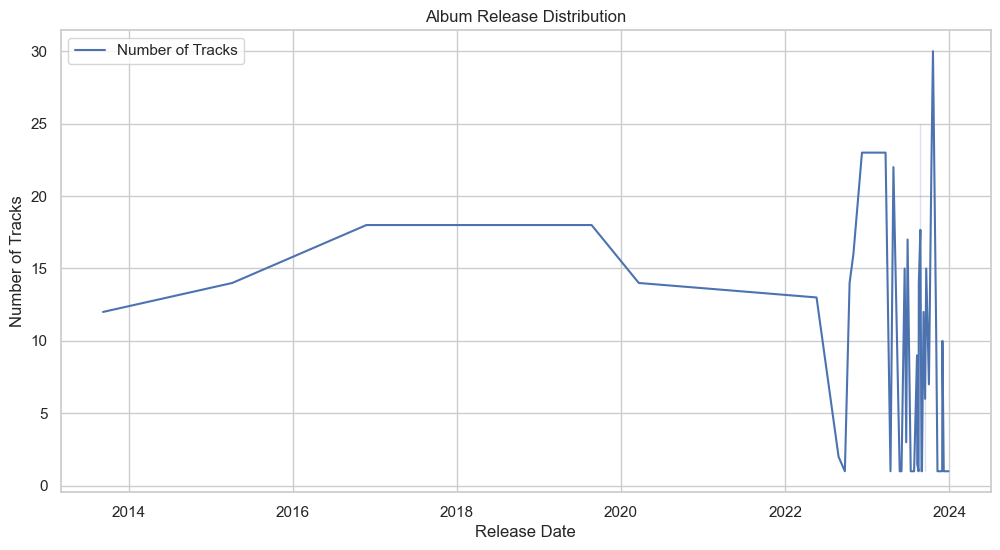

In [39]:
# Visualization: Album Release Distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='total_tracks', data=album_df, label='Number of Tracks')
plt.title('Album Release Distribution')
plt.xlabel('Release Date')
plt.ylabel('Number of Tracks')
plt.show()

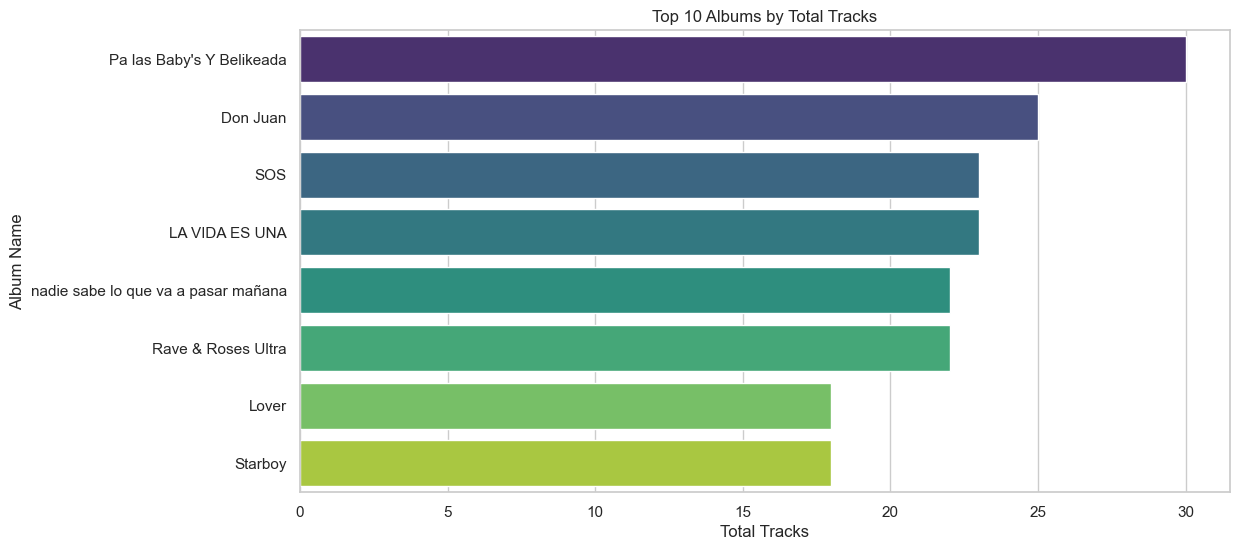

In [40]:
# Visualization: Top 10 Albums by Popularity
top_n = 10
top_albums = album_df.nlargest(top_n, 'total_tracks')

plt.figure(figsize=(12, 6))
sns.barplot(x='total_tracks', y='name', data=top_albums, palette='viridis')
plt.title(f'Top {top_n} Albums by Total Tracks')
plt.xlabel('Total Tracks')
plt.ylabel('Album Name')
plt.show()